In [7]:
import numpy as np
from scipy.sparse import diags, kron, csr_matrix, csc_matrix, identity
from scipy.sparse.linalg import spsolve, norm, inv, eigsh
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True) # para usar latex en matplotlib

*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Emir Chacra y Vicente Salinas

# Laboratorio 1

El objetivo de esta sesión práctica es aprender a resolver EDP’s en 2
dimensiones mediante el Método de las Diferencias Finitas.

Específicamente se resolverá la ecuación de Poisson en un rectángulo unitario y en un dominio perforado, además se estudiará la aproximación para condiciones de borde en dominios con curvatura

# Parte a


## Ecuación de Poisson

Considere la ecuación dada por

$$
\begin{equation}
\left.
\begin{array}[c]{rll}
-\Delta u= & 0 & \text{sobre }\Omega=\left[  0,1\right]^{2}\\
u(0,y)=u(1,y)= & 0 & \text{en }0\leq y\leq 1\\
u(x,0)= & 0 & \text{en }0\leq x\leq 1\\
u(x,1)= & g(x) & \text{en }0\leq x\leq 1
\end{array}
\right\} \quad (1)
\end{equation}
$$

Sea $N\in\mathbb{N}$, considere la aproximación del cuadrado unitario dado por la malla de puntos
$$
\Omega_{h}=\left\{  \left(  x_{j},y_{k}\right)  \mid j,k\in\left\{
0,1,\ldots,N+1\right\}  \right\}
$$
donde $x_{j}=jh$, $y_{k}=kh$, $h=\dfrac{1}{N+1}$. Se define el operador laplaciano discretizado por 5 puntos como
$$
\Delta_{N}u_{j,k}=\dfrac{1}{h^{2}}\left(  u_{j+1,k}+u_{j-1,k}
+  u_{j,k-1}+u_{j,k+1}
-4u_{jk}\right)
$$
donde $u_{jk}$ aproxima a $u\left(x_{j},y_{k}\right)  $.

Tomando $g(x) = \sin(\pi x)$, se puede demostrar que la solución única de esta ecuación está dada por

$$u\left(  x,y\right)  =\frac{\sin\left( \pi x\right)   \sinh\left( \pi y\right)  }{\sinh\left(  \pi\right) } $$

**P1.** Escriba dos funciones que calculen $\boldsymbol{A}_{h}$ y $\boldsymbol{b}_{h}$ de la forma más simple posible. Las entradas para estas funciones deben ser $N$ y $g$.

También escriba una función `solve` que, utilizando estas funciones (y las funciones auxiliares que necesite), entregue la solución aproximada.

**Indicación.** Revise la documentación del comando `kron` (disponible a través de `scypy.sparse`)

In [22]:
N = 3
e = np.ones(N)
f = np.ones(N-1)
k = np.array([-f,4*e,-f], dtype= object)
offset = [-1,0,1]

L4 = diags(k,offset)
    
I = identity(N)
AL4 = kron(I, L4)
    
d0d = np.array([-f,0,-f], dtype= object)
offset = [-1,0,1]
D0D = diags(d0d,offset)

A1 = kron(D0D, I)

A = A1+AL4
A.todense()

matrix([[ 4., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  4., -1.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  4.,  0.,  0., -1.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  4., -1.,  0., -1.,  0.,  0.],
        [ 0., -1.,  0., -1.,  4., -1.,  0., -1.,  0.],
        [ 0.,  0., -1.,  0., -1.,  4.,  0.,  0., -1.],
        [ 0.,  0.,  0., -1.,  0.,  0.,  4., -1.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0., -1.,  4., -1.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  4.]])

In [43]:
def Ah(N):
    e = np.ones(N)
    f = np.ones(N-1)
    k = np.array([-f,4*e,-f], dtype= object)
    offset = [-1,0,1]

    L4 = diags(k,offset)

    I = identity(N)
    AL4 = kron(I, L4)

    d0d = np.array([-f,0,-f], dtype= object)
    offset = [-1,0,1]
    D0D = diags(d0d,offset)

    A1 = kron(D0D, I)

    A = A1+AL4
    h = 1/(N+1)
    return ((1/h)**2)*(A)


def bh(N,f,g):
    b = f
    h = 1/(N+1)
    for i in range(1, N+1):
        xi = i*h
        b[N*(N-1)+i-1] += g(xi)/h**2
    return b 

def solve(N, f, g):
    """Resuelve el problema del laplaciano en 2D en (0,1)^2, con condiciones
    Dirichlet en el borde, usando una grilla uniforme, con tamano de
    paso h=1/N en x e y.
    """
    A = Ah(N)
    b = bh(N, f, g)
    u = spsolve(A, b)
    return u

**P2.** Resuelva la ecuación para $N = 10, 20, 30, 40, 50$. Comente sus resultados.

In [191]:
params = {"N": [10, 20, 30, 40, 50]}
g = lambda x: np.sin(np.pi*x)
u = []
for N in params["N"]:
    uN = solve(N, np.zeros(N**2), g)
    u.append(uN)

In [192]:
xx = np.linspace(0,1, 50)
yy = xx.copy()
X, Y = np.meshgrid(xx, yy, indexing="ij")
u_org = lambda x, y: np.sin(np.pi*x)*np.sinh(np.pi*y)/np.sinh(np.pi)
Z = u_org(X, Y)

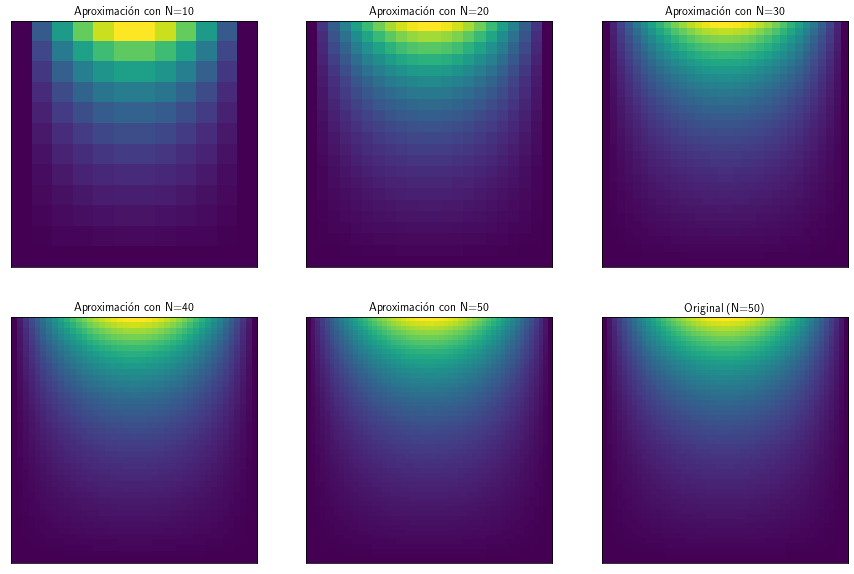

In [212]:
fig, ax = plt.subplots(2, 3, figsize=(3*5, 2*5))
for k in range(len(params["N"])):
    N = params["N"][k]
    i, j = k//3, k%3
    axk = ax[i, j]
#     axk.contourf(X,Y,u[k].reshape(N,N),100)
    bu = np.zeros((N+2, N+2))
    for i in range(N+2):
        for j in range(N+2):
            if 0<i<N+1:
                if 0<j<N+1:
                    bu[i, j] += u[k].reshape(N, N)[i-1, j-1]
            if i == N+1:
                h = 1/(N+1)
                bu[i, j] += g(j*h)
    axk.imshow(bu, origin="lower")
    axk.set_title(f"Aproximación con N={N}")
#     axk.set_xtight([])
    axk.set_xticks([])
    axk.set_yticks([])

axk = ax[1, 2]
axk.imshow(Z.T, origin="lower")
axk.set_title("Original (N=50)")
axk.set_xticks([])
axk.set_yticks([]);

**P3.** Estudie el condicionamiento en norma $2$ de la Matriz $A_h$.

**Indicación.** Sean $p\in\left[  1,+\infty\right]  $ y $\boldsymbol{A}\in\mathbb{R}^{N\times N}$. Se define la norma inducida $p$ de $\boldsymbol{A}$ como
$$
\left\Vert \boldsymbol{A}\right\Vert _{p}=\sup\limits_{\boldsymbol{x\in}\mathbb{R}^{N}\setminus\left\{  \boldsymbol{0}\right\}  }\dfrac{\left\Vert\boldsymbol{Ax}\right\Vert _{p}}{\left\Vert \boldsymbol{x}\right\Vert_{p}}
$$
y, si $\boldsymbol{A}$ es invertible, el número de condición en norma inducida $p$ como $\operatorname{cond}_{p}\left(  \boldsymbol{A}\right)  =\left\Vert
\boldsymbol{A}\right\Vert _{p}\left\Vert \boldsymbol{A}^{-1}\right\Vert _{p}$.

En este caso particular, como $\boldsymbol{A}_{h}$ es simétrica, el número de condición en la norma $2$ inducida puede calcularse como
$$
\operatorname{cond}_{2}\left(  \boldsymbol{A}_{h}\right)  =\dfrac{\lambda_{\max,h}\left(  \boldsymbol{A}_{h}\right)  }{\lambda_{\min,h}\left(\boldsymbol{A}_{h}\right)}
$$
donde $\lambda_{\max,h}\left(  \boldsymbol{A}_{h}\right)  =\max\left\{\left\vert \lambda\right\vert \mid\lambda\in\sigma\left(  \boldsymbol{A}_{h}\right)  \right\}  $ y $\lambda_{\min,h}\left(  \boldsymbol{A}_{h}\right)
=\min\left\{  \left\vert \lambda\right\vert \mid\lambda\in\sigma\left(\boldsymbol{A}_{h}\right)  \right\}  $.

In [5]:
def cond_2_sparse(A):
    """
    Calcula el numero de condicionamiento en norma inducida 2
    para una matriz sparse simetrica A.
    Se obtiene como el valor propio de mayor módulo dividido por el de menor módulo
    
    Input:
    - A matriz sparse simetrica
    
    Documentacion de eigsh:
    https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.sparse.linalg.eigsh.html
    """

    
    
    max = eigsh(A,k=1,which='LM')[0][0]
    min = eigsh(A,k=1,which='SM')[0][0]
    cond = max/min
    return cond

# Parte b

## Ecuación en Dominios Perforados

Para $\Omega = [0, 1]^2\backslash B ((0.5, 0.5), 0.3)$, considere:
$$
\left(  P \right)  \left\{
\begin{array}
[c]{ccc}
-\Delta u(x,y)=&0,  & \text{si }(x,y)\text{ en }\Omega \\
u(x,y)=&g(x,y), & \text{si} (x,y)\text{ en }\partial\Omega
\end{array}
\right.
$$

y $g$ dada por:

$$
g\left(  x,y\right)  =\left\{
\begin{array}
[c]{cc}
2  & \text{si }(x,y) \in \partial [0,1]^2 \\
0  & \text{si }(x,y) \in \partial B ((0.5, 0.5), 0.3)
\end{array}
\right.
$$






**P1.** Genere una función que reciba un punto de la malla $(x_j , y_k)$ y entregue como resultado $1$ si es un
punto interior al cual se le puede calcular $\Delta u$ con la aproximación utilizada en la fórmula de $5$ puntos.

In [158]:
def can(x, y, N):
    def isin(x, y):
        if 0<=x<=1 and 0<=y<=1:
            return np.linalg.norm((x-0.5, y-0.5), ord=2)>=0.3
        return False
    h = 1/(N+1)
    neighbours_x = [(x+h*(-1)**i, y) for i in range(2)]
    neighbours_y = [(x, y+h*(-1)**i) for i in range(2)]
    return all([isin(*n) for n in neighbours_x]), all([isin(*n) for n in neighbours_y])

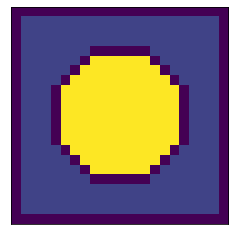

In [169]:
N = 20
im = np.zeros((N+2, N+2))
for i in range(N+2):
    for j in range(N+2): 
        x, y = i/(N+1), j/(N+1)
        cc = can(x, y, N)
#         print((x, y), cc)
        im[i, j] = all(cc)
        im[i, j] += 5*int(np.linalg.norm((x-0.5, y-0.5), ord=2)<0.3)
#         im[i, j] += 10*cc[1]
plt.imshow(im.T)#,origin='lower')
plt.xticks([])
plt.yticks([]);

**P2.** Asuma que la matriz del sistema es de la forma $A = A_x + A_y$, donde $A_x$ tiene los coeficientes adecuados
para la aproximación de la derivada parcial según $x$ y lo equivalente para $A_y$. Encuentre la forma
que deben tener $A_x$ y $A_y$ y escriba un programa que calcule dichas matrices.

In [224]:
def Ahx(N):
    Ax = np.zeros((N**2, N**2))
    h = 1/(N+1)
    for n in range(N**2):
        i, j = n%N, n//N
        x, y = (i+1)*h, (j+1)*h
        if np.linalg.norm((x-0.5, y-0.5), ord=2)>=0.3:
            canx, _ = can(x, y, N)
            if canx:
                Ax[n, n] = 2
                if i>0:
                    Ax[n, n-1] = -1
                if i<N-1:
                    Ax[n, n+1] = -1
            else:
                if x < 0.5:  
                    k = abs(0.5+np.sqrt(0.3**2 - (y-0.5)**2)-x) 
                    Ax[n, n] = -2/(h*k)     
                    if i>0:
                        Ax[n, n-1] = 2/(h*(h+k))
                else:
                    k = abs(0.5-np.sqrt(0.3**2 - (y-0.5)**2)-x) 
                    Ax[n, n] = -2/(h*k)    
                    if i<N-1:
                        Ax[n, n+1] = 2/(h*(h+k))
    return Ax/(h**2)

def Ahy(N):
    Ay = np.zeros((N**2, N**2))
    h = 1/(N+1)
    for n in range(N**2):
        i, j = n%N, n//N
        x, y = (i+1)*h, (j+1)*h
        if np.linalg.norm((x-0.5, y-0.5), ord=2)>=0.3:
            _, cany = can(x, y, N)
            if cany:
                Ay[n, n] = 2
                if j>0:
                    Ay[n, n-N] = -1
                if j<N-1:
                    Ay[n, n+N] = -1
            else:
                if y < 0.5:  
                    k = abs(0.5+np.sqrt(0.3**2 - (x-0.5)**2)-y) 
                    Ay[n, n] = -2/(h*k)     
                    if j>0:
                        Ay[n, n-1] = 2/(h*(h+k))
                else:
                    k = abs(0.5-np.sqrt(0.3**2 - (x-0.5)**2)-y) 
                    Ay[n, n] = -2/(h*k)    
                    if j<N-1:
                        Ay[n, n+1] = 2/(h*(h+k))
    return Ay/(h**2)

In [229]:
import pandas as pd
import seaborn as sns

<AxesSubplot:>

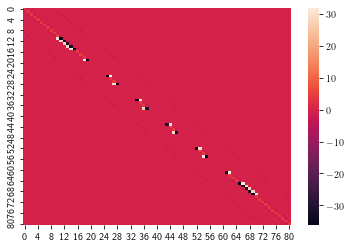

In [231]:
N = 9
sns.heatmap(pd.DataFrame(Ahx(N)+Ahy(N)))

**P3.** Escriba una función que calcule $b_h$ adaptado a este caso.

In [18]:
def bh(N):
    
    
    return b

def solve2(N):
    
    return 

**P4.** Resuelva el sistema y grafique la solución aproximada para $N = 10, 20, 30, 40, 50$. Comente sus resultados.

**P5.** ¿Qué sucede con el condicionamiento de la matriz utilizando la fórmula de la Parte a?¿Cómo adaptaría su código para el caso $f\neq 0$?